In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
# Load our dataset
df = pd.read_csv("Dataset .csv")

In [5]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [6]:
#restaurant chains present in dataset

chain_counts = df['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1]

print("Restaurant Chains:")
print(restaurant_chains)

Restaurant Chains:
Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64


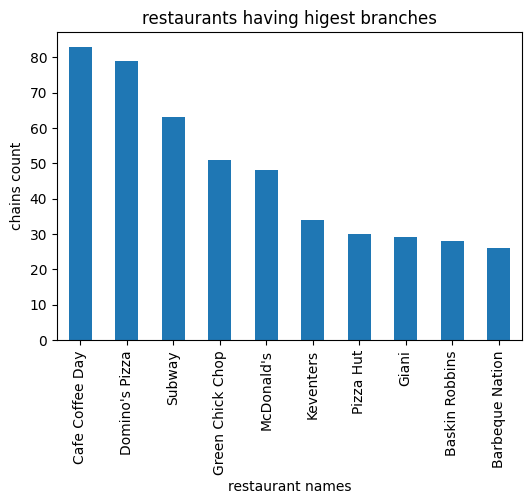

In [7]:
#visualizing the branches of restaurant

res_chain=restaurant_chains.head(10)
plt.figure(figsize=(6, 4))
res_chain.plot(kind='bar')
plt.title('restaurants having higest branches')
plt.xlabel('restaurant names')
plt.ylabel('chains count')
plt.show()

                     Restaurant Name  Aggregate rating
5322  Restaurant Mosaic @ The Orient               4.9
4177                Ministry of Crab               4.9
4135                           Miann               4.9
5757         Shorts Burger and Shine               4.9
4165                           Milse               4.9
7339                 Yellow Dog Eats               4.9
2133                   Duck & Waffle               4.9
2559                    Gaga Manjero               4.9
4182                 Mirchi And Mime               4.9
4078   McGuire's Irish Pub & Brewery               4.9


<Figure size 600x400 with 0 Axes>

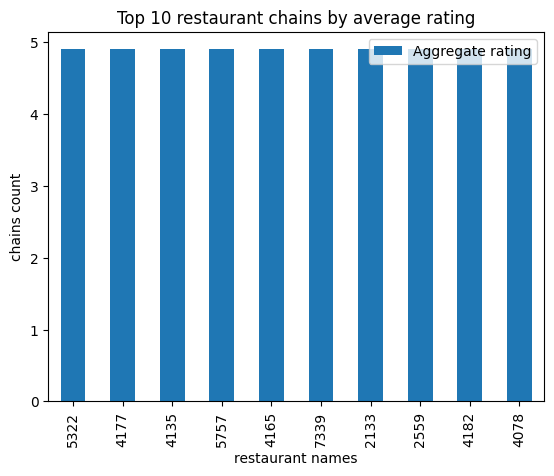

In [8]:
#ratings and popularity of different restaurant chains

chain_ratings = df.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index()
#chain_votes = df.groupby('Restaurant Name')['Votes'].sum().reset_index(name="Total votes") 
chain_ratings = chain_ratings.sort_values('Aggregate rating', ascending=False)
chain_ratings=chain_ratings.head(10)
print(chain_ratings)

#visualizing
plt.figure(figsize=(6, 4))
chain_ratings.plot(kind='bar')
plt.title('Top 10 restaurant chains by average rating')
plt.xlabel('restaurant names')
plt.ylabel('chains count')
plt.show()

In [9]:
#popularity can be analyzed by votes
restaurant_popularity = df.groupby('Restaurant Name')['Votes'].sum().reset_index()
restaurant_popularity = restaurant_popularity.sort_values('Votes', ascending=False)
print("Top 10 Restaurants by Total Votes:")
print(restaurant_popularity.head(10))

Top 10 Restaurants by Total Votes:
                Restaurant Name  Votes
663             Barbeque Nation  28142
101   AB's - Absolute Barbecues  13400
6943                       Toit  10934
785                   Big Chill  10853
2297                 Farzi Cafe  10098
6988                   Truffles   9682
1510                    Chili's   8156
2879           Hauz Khas Social   7931
3261               Joey's Pizza   7807
4902                  Peter Cat   7574


<Figure size 600x400 with 0 Axes>

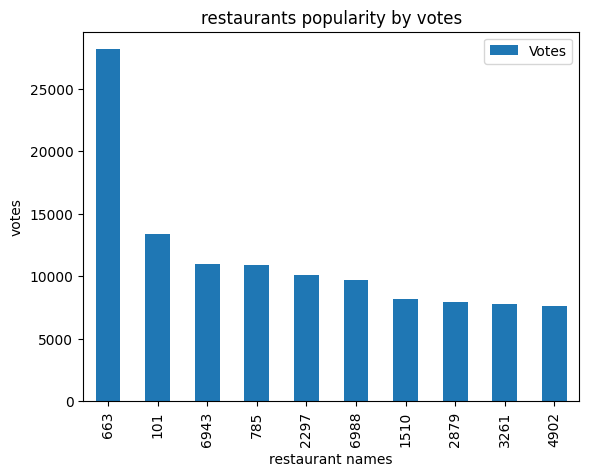

In [10]:
#visualizing
plt.figure(figsize=(6, 4))
res_pop=restaurant_popularity.head(10)
res_pop.plot(kind='bar')
plt.title('restaurants popularity by votes')
plt.xlabel('restaurant names')
plt.ylabel('votes')
plt.show()